In [1]:
%load_ext kedro.ipython

[04/02/24 23:01:09] INFO     Registered line magic '%reload_kedro'                                   ]8;id=38284;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=940113;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py#51\51]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=932118;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=318000;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py#53\53]8;;\

                    INFO     Resolved project path as:                                              ]8;id=79005;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=592984;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py#164\164]8;;\
                             /Users/wilsvenleong/Downloads/learning-materials/fraud-transactions-da                
                             taset.                                                                                
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/02/24 23:01:10] INFO     Kedro project Fraud Transactions Dataset                               ]8;id=723776;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=4210;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py#134\134]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=37515;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=545571;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py#135\135]8;;\
                             'pipelines'                                                                           

[04/02/24 23:01:11] INFO     Registered line magic 'run_viz'                                        ]8;id=939064;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=833704;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

In [2]:
catalog.list()


[
    'fraud_train_raw',
    'fraud_test_raw',
    'fraud_train_processed',
    'fraud_val_processed',
    'fraud_test_processed',
    'parameters'
]

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [4]:
train_df = catalog.load("fraud_train_raw")

# Remove Unnamed column
train_df = train_df.iloc[:, 1:]
train_df

                    INFO     Loading data from fraud_train (CSVDataset)...                      ]8;id=418553;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=415115;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/site-packages/kedro/io/data_catalog.py#483\483]8;;\

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"])
train_df["dob"] = pd.to_datetime(train_df["dob"])

In [8]:
print("Number of duplicated data : ", train_df.duplicated().sum())

Number of duplicated data :  0


In [9]:
train_df.columns


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
fraudulant_transactions = train_df[train_df["is_fraud"] == 1]
non_fraudulant_transactions = train_df[train_df["is_fraud"] == 0]

print(f"Total number of fraudulant transactions : {len(fraudulant_transactions)}")
print(
    f"Total number of non-fraudulant transactions : {len(non_fraudulant_transactions)}"
)

Total number of fraudulant transactions : 7506
Total number of non-fraudulant transactions : 1289169


### `is_fraud`

In [11]:
corr_df = train_df.loc[:, train_df.columns[train_df.dtypes != object].to_list()]
correlation = corr_df.corr()
print(correlation["is_fraud"].sort_values(ascending=False))

is_fraud                 1.000000
amt                      0.219404
city_pop                 0.002136
lat                      0.001894
merch_lat                0.001741
merch_long               0.001721
long                     0.001721
cc_num                  -0.000981
zip                     -0.002162
trans_date_trans_time   -0.005041
unix_time               -0.005078
dob                     -0.012391
Name: is_fraud, dtype: float64


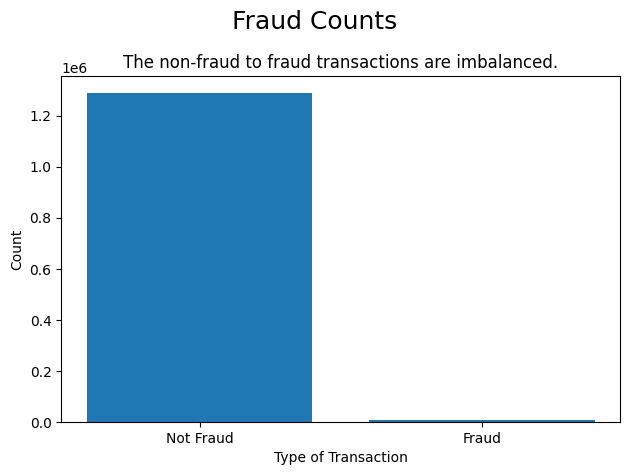

In [12]:
fraud_counts = pd.DataFrame(train_df["is_fraud"].value_counts()).reset_index(
    names="Type"
)
fraud_counts["Type"] = fraud_counts["Type"].map({0: "Not Fraud", 1: "Fraud"})


plt.bar(fraud_counts["Type"], height=fraud_counts["count"])
plt.suptitle("Fraud Counts", fontsize=18)
plt.title("The non-fraud to fraud transactions are imbalanced.")
plt.xlabel("Type of Transaction")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### `amt`

In [13]:
amt_transaction = train_df[["amt", "is_fraud"]]
amt_transaction

,amt,is_fraud
0,4.97,0
1,107.23,0
2,220.11,0
3,45.00,0
4,41.96,0
...,...,...
1296670,15.56,0
1296671,51.70,0
1296672,105.93,0
1296673,74.90,0


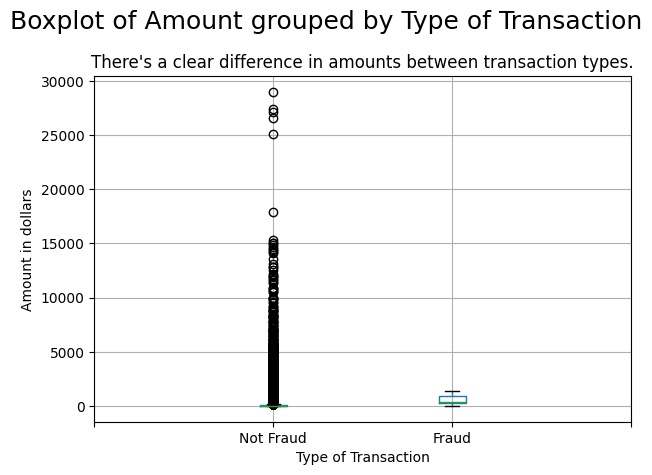

In [14]:
amt_transaction.boxplot(column=["amt"], by="is_fraud")
plt.suptitle("Boxplot of Amount grouped by Type of Transaction", fontsize=18)
plt.title("There's a clear difference in amounts between transaction types.")
plt.xlabel("Type of Transaction")
plt.ylabel("Amount in dollars")
plt.xticks([0, 1, 2, 3], ["", "Not Fraud", "Fraud", ""])
plt.tight_layout()
plt.show()

Lowest amount for a fraudulant transaction: 1.06
Highest amount for a fraudulant transaction: 1376.04


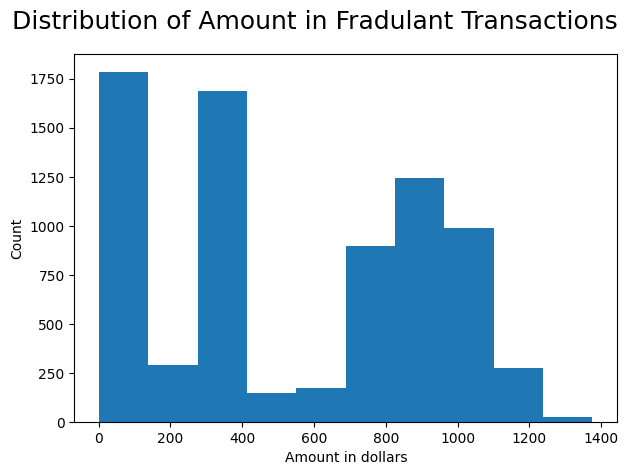

In [15]:
amt_fraud = fraudulant_transactions["amt"]

print(f"Lowest amount for a fraudulant transaction: {amt_fraud.min()}")
print(f"Highest amount for a fraudulant transaction: {amt_fraud.max()}")

plt.hist(amt_fraud)
plt.suptitle("Distribution of Amount in Fradulant Transactions", fontsize=18)
plt.xlabel("Amount in dollars")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [16]:
non_fraud_amt = non_fraudulant_transactions["amt"]

print(f"Lowest amount for a non-fraudulant transaction: {non_fraud_amt.min()}")
print(f"Highest amount for a non-fraudulant transaction: {non_fraud_amt.max()}")

Lowest amount for a non-fraudulant transaction: 1.0
Highest amount for a non-fraudulant transaction: 28948.9


### `state`

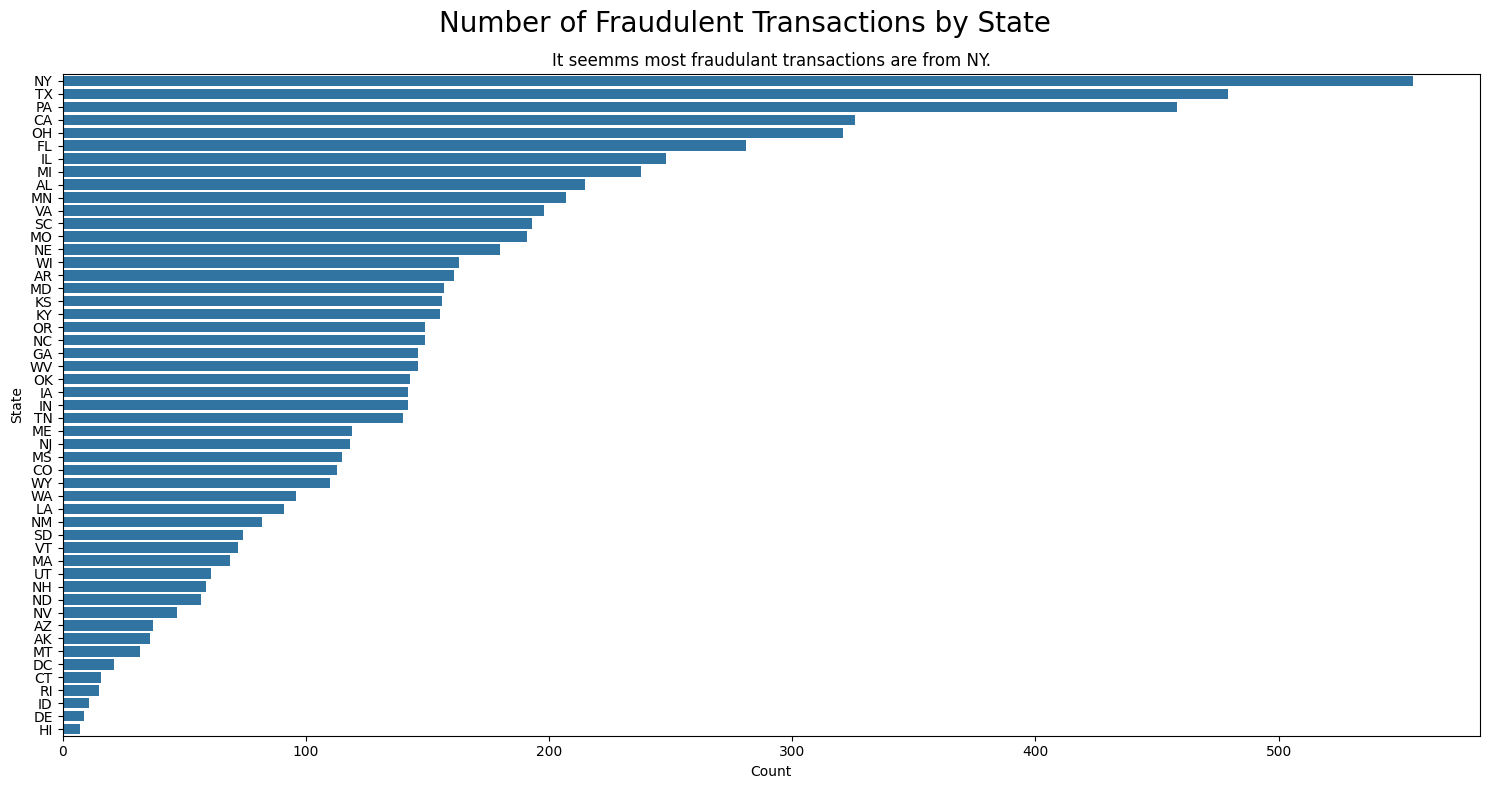

In [17]:
plt.figure(figsize=(15, 8))
sns.countplot(
    data=fraudulant_transactions,
    y="state",
    order=fraudulant_transactions["state"].value_counts().index,
)
plt.suptitle("Number of Fraudulent Transactions by State", fontsize=20)
plt.title("It seemms most fraudulant transactions are from NY.")
plt.xlabel("Count")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### `city`

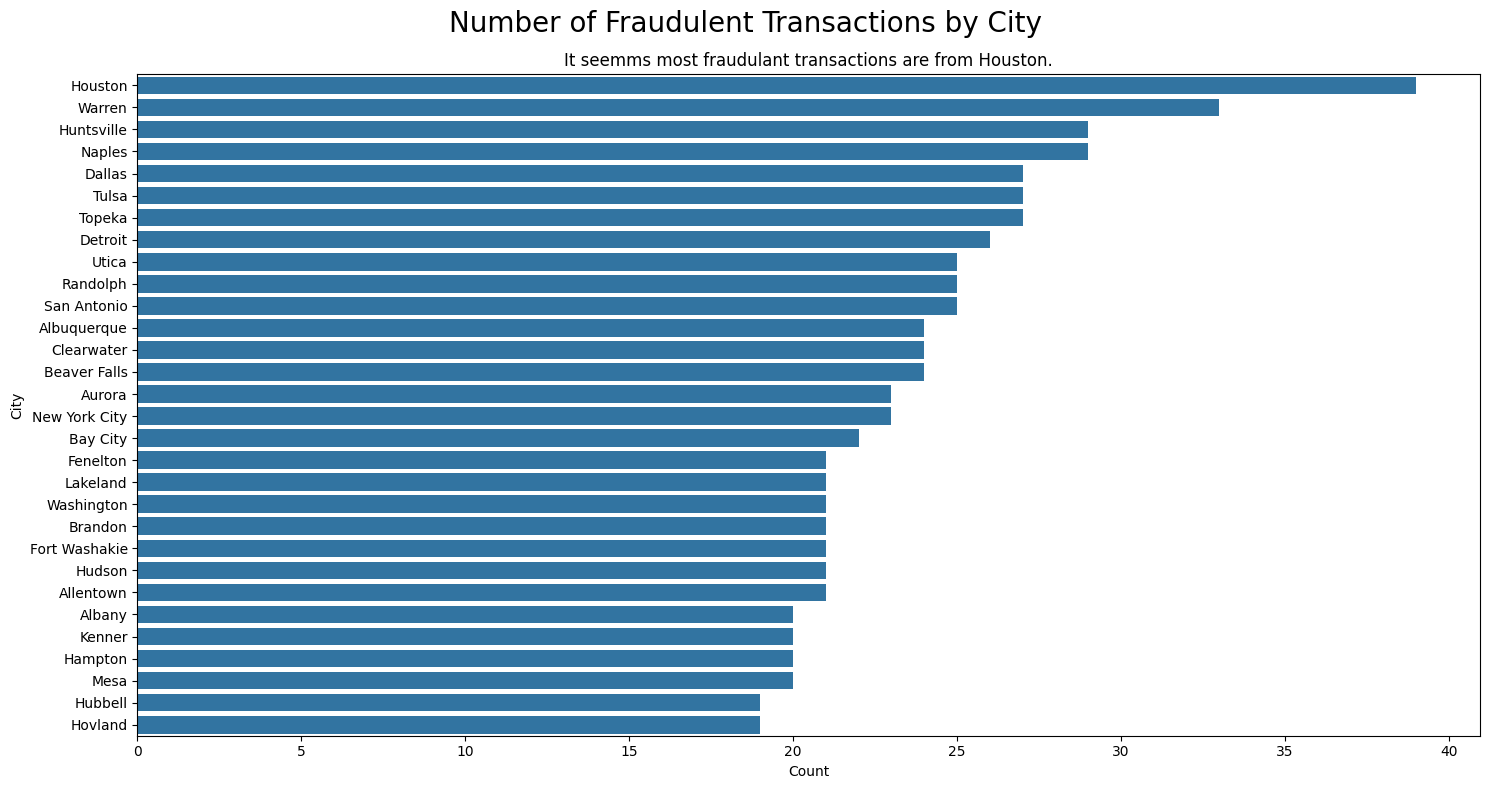

In [18]:
plt.figure(figsize=(15, 8))
top_cities = fraudulant_transactions["city"].value_counts().head(30).index
sns.countplot(
    data=fraudulant_transactions,
    y="city",
    order=top_cities,
)
plt.suptitle("Number of Fraudulent Transactions by City", fontsize=20)
plt.title("It seemms most fraudulant transactions are from Houston.")
plt.xlabel("Count")
plt.ylabel("City")
plt.tight_layout()
plt.show()

### `category`

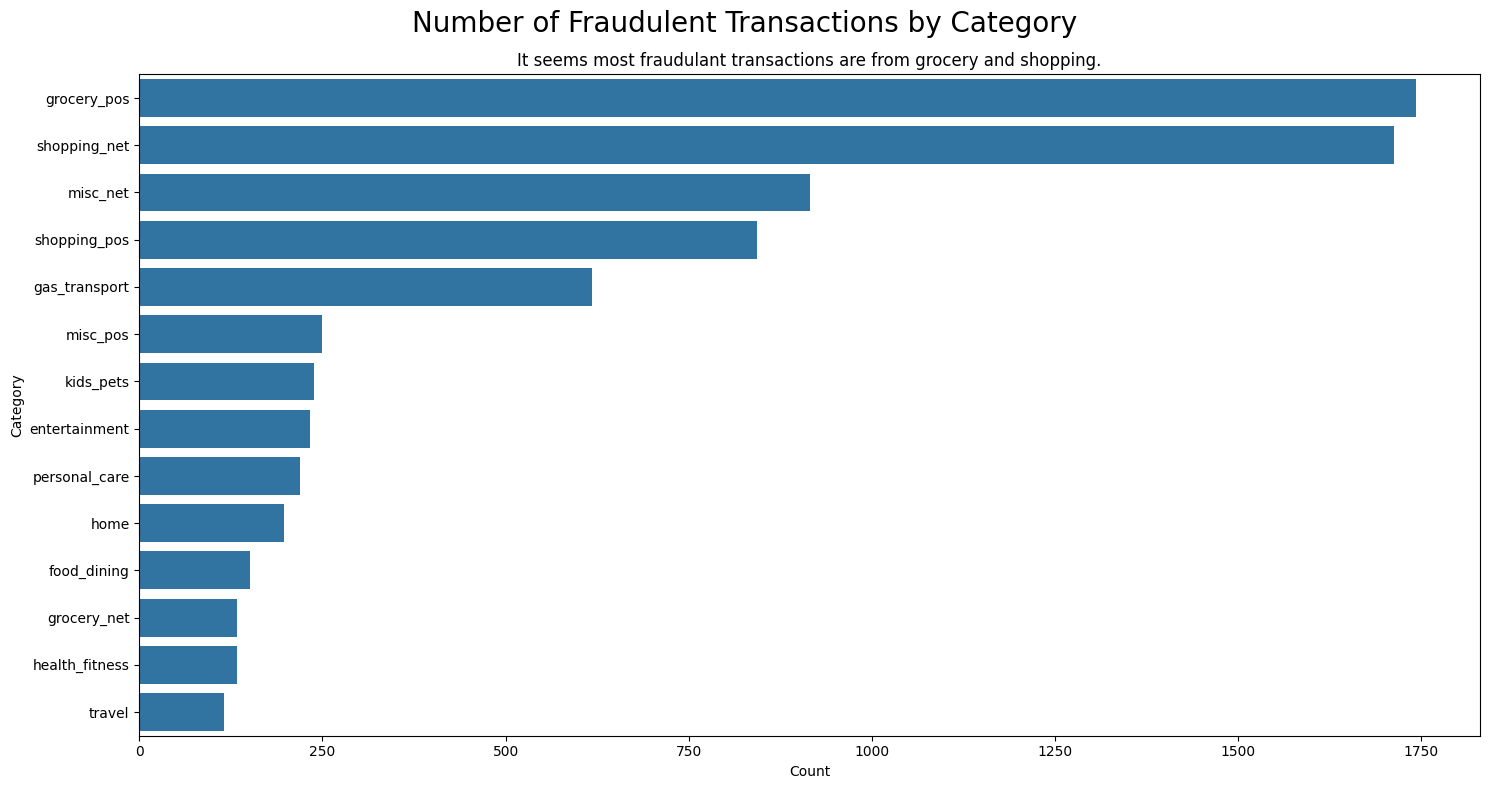

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(
    data=fraudulant_transactions,
    y="category",
    order=fraudulant_transactions["category"].value_counts().index,
)
plt.suptitle("Number of Fraudulent Transactions by Category", fontsize=20)
plt.title("It seems most fraudulant transactions are from grocery and shopping.")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### `merchant`

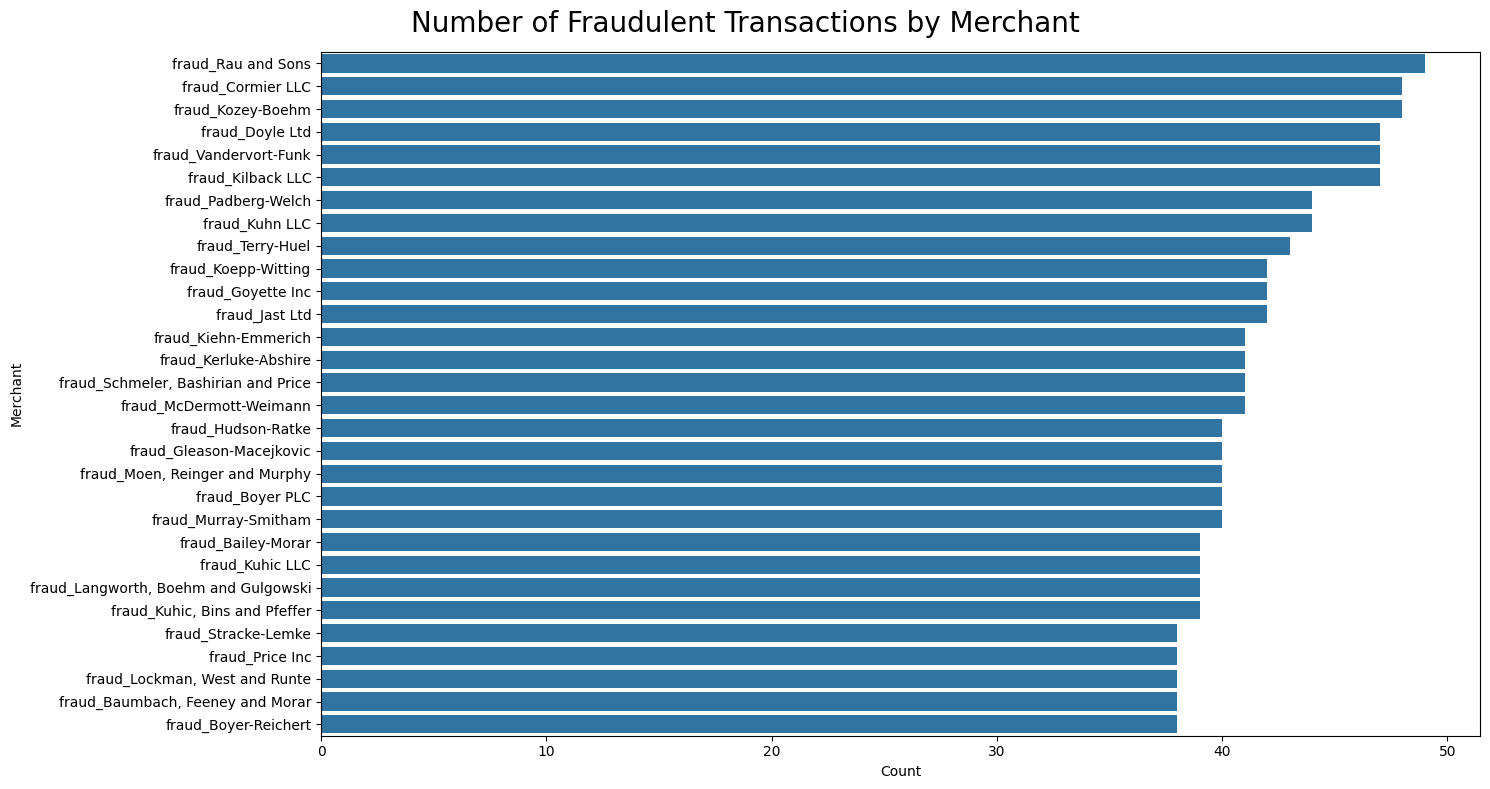

In [20]:
plt.figure(figsize=(15, 8))
top_merchants = fraudulant_transactions["merchant"].value_counts().head(30).index
sns.countplot(
    data=fraudulant_transactions,
    y="merchant",
    order=top_merchants,
)
plt.suptitle("Number of Fraudulent Transactions by Merchant", fontsize=20)
plt.xlabel("Count")
plt.ylabel("Merchant")
plt.tight_layout()
plt.show()

### `job`

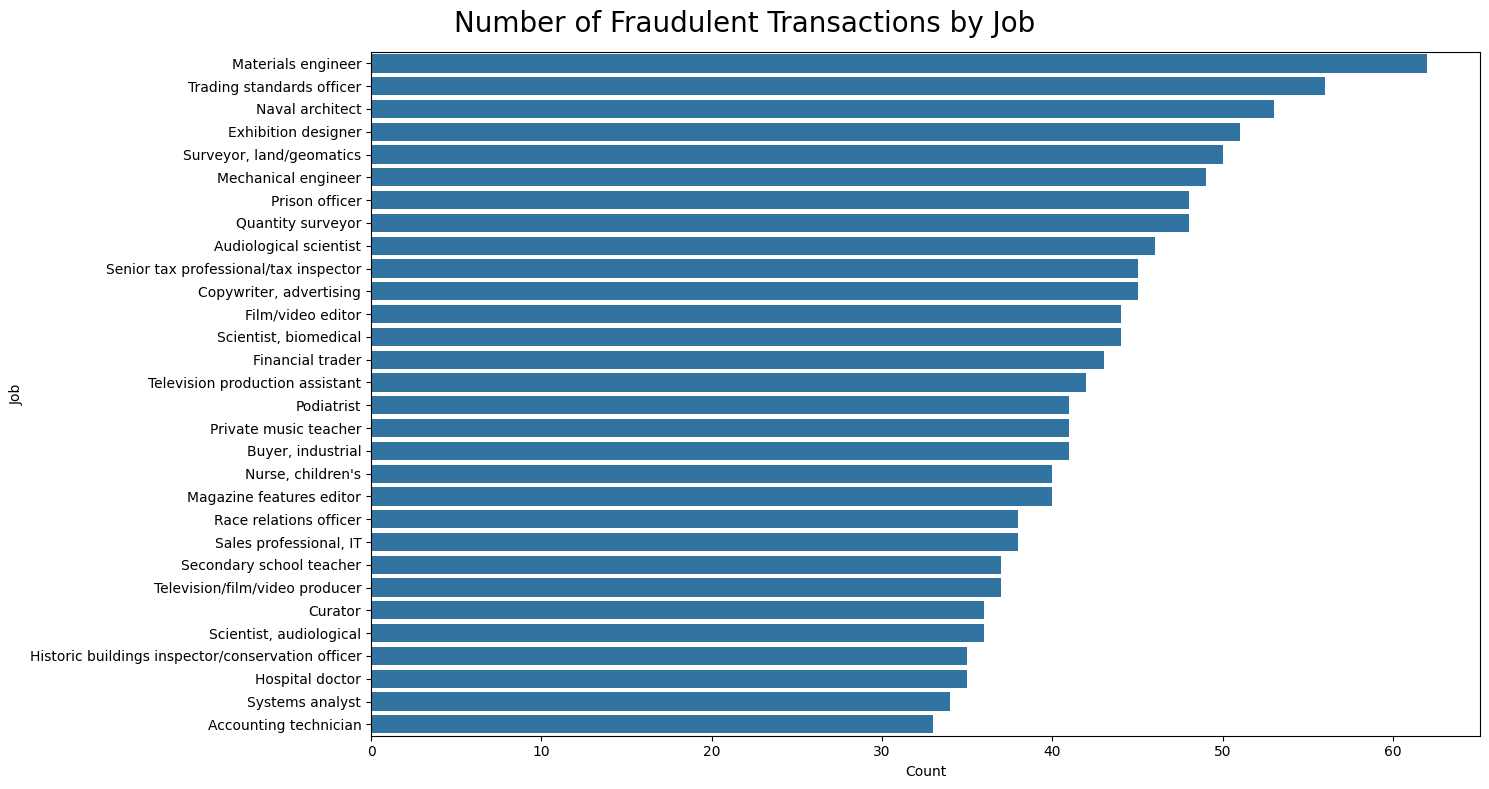

In [21]:
plt.figure(figsize=(15, 8))
top_jobs = fraudulant_transactions["job"].value_counts().head(30).index
sns.countplot(
    data=fraudulant_transactions,
    y="job",
    order=top_jobs,
)
plt.suptitle("Number of Fraudulent Transactions by Job", fontsize=20)
plt.xlabel("Count")
plt.ylabel("Job")
plt.tight_layout()
plt.show()

### `trans_date_trans_time`

In [22]:
fraudulant_transactions.loc[:, "year"] = fraudulant_transactions[
    "trans_date_trans_time"
].dt.year
fraudulant_transactions.loc[:, "month"] = fraudulant_transactions[
    "trans_date_trans_time"
].dt.month

days = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
fraudulant_transactions.loc[:, "dayofweek"] = fraudulant_transactions[
    "trans_date_trans_time"
].dt.dayofweek.map(days)

fraudulant_transactions.loc[:, "hour"] = fraudulant_transactions[
    "trans_date_trans_time"
].dt.hour

[04/02/24 21:24:47] WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/54376 ]8;id=70647;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=294893;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             4977.py:1: SettingWithCopyWarning:                                                    
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               fraudulant_transactions.loc[:, "year"] = fraudulant_transactions[                   
                                                                                                                   

                    WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/54376 ]8;id=894301;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=743478;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             4977.py:4: SettingWithCopyWarning:                                                    
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               fraudulant_transactions.loc[:, "month"] = fraudulant_transactions[                  
                                                                                                                   

                    WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/54376 ]8;id=343043;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=814462;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             4977.py:9: SettingWithCopyWarning:                                                    
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               fraudulant_transactions.loc[:, "dayofweek"] =                                       
                             fraudulant_transactions[                                                              
                                                                                                                   

                    WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/54376 ]8;id=846583;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=281329;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             4977.py:13: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               fraudulant_transactions.loc[:, "hour"] = fraudulant_transactions[                   
                                                                                                                   

In [23]:
fraudulant_transactions["year"].unique()

array([2019, 2020], dtype=int32)

In [24]:
fraud_2019 = fraudulant_transactions[fraudulant_transactions["year"] == 2019]
fraud_2020 = fraudulant_transactions[fraudulant_transactions["year"] == 2020]

print(f"Number of fraudulant transactions in 2019: {len(fraud_2019)}")
print(f"Number of fraudulant transactions in 2020: {len(fraud_2020)}")

Number of fraudulant transactions in 2019: 5220
Number of fraudulant transactions in 2020: 2286


### `month`

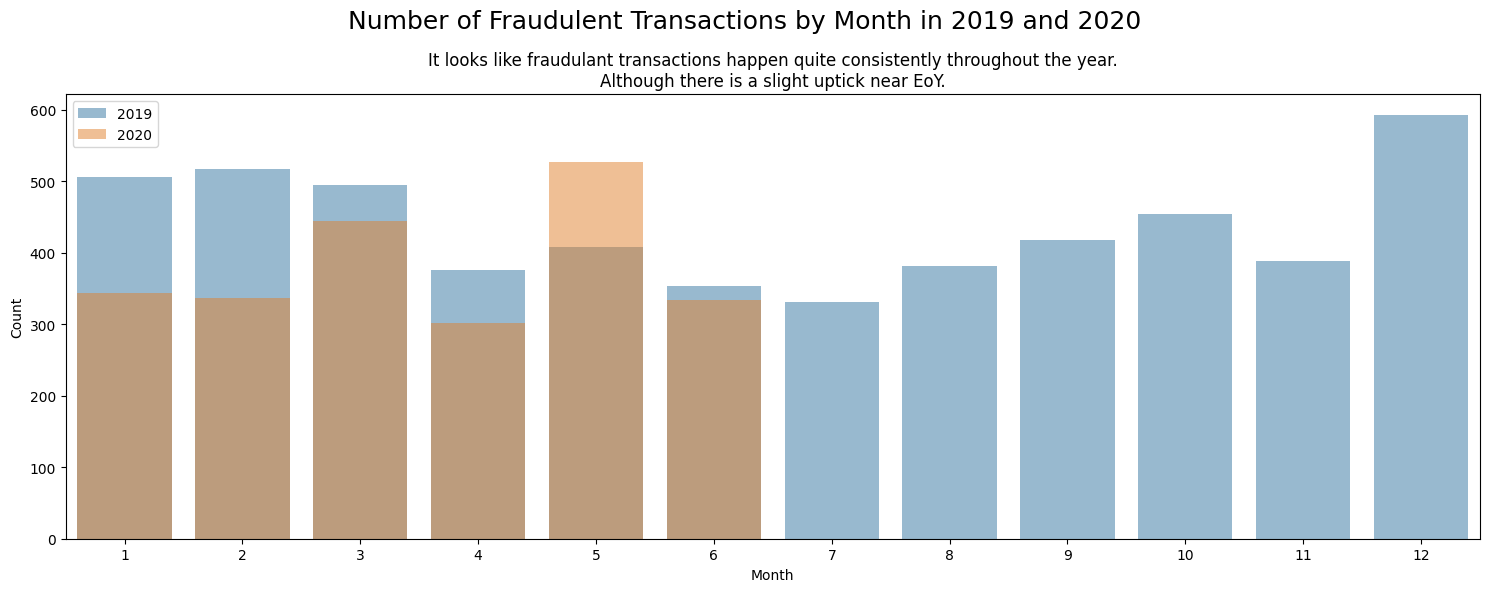

In [25]:
plt.figure(figsize=(15, 6))
sns.countplot(data=fraud_2019, x="month", alpha=0.5, label="2019")
sns.countplot(data=fraud_2020, x="month", alpha=0.5, label="2020")
plt.suptitle("Number of Fraudulent Transactions by Month in 2019 and 2020", fontsize=18)
plt.title(
    "It looks like fraudulant transactions happen quite consistently throughout the year.\nAlthough there is a slight uptick near EoY."
)
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### `dayofweek`

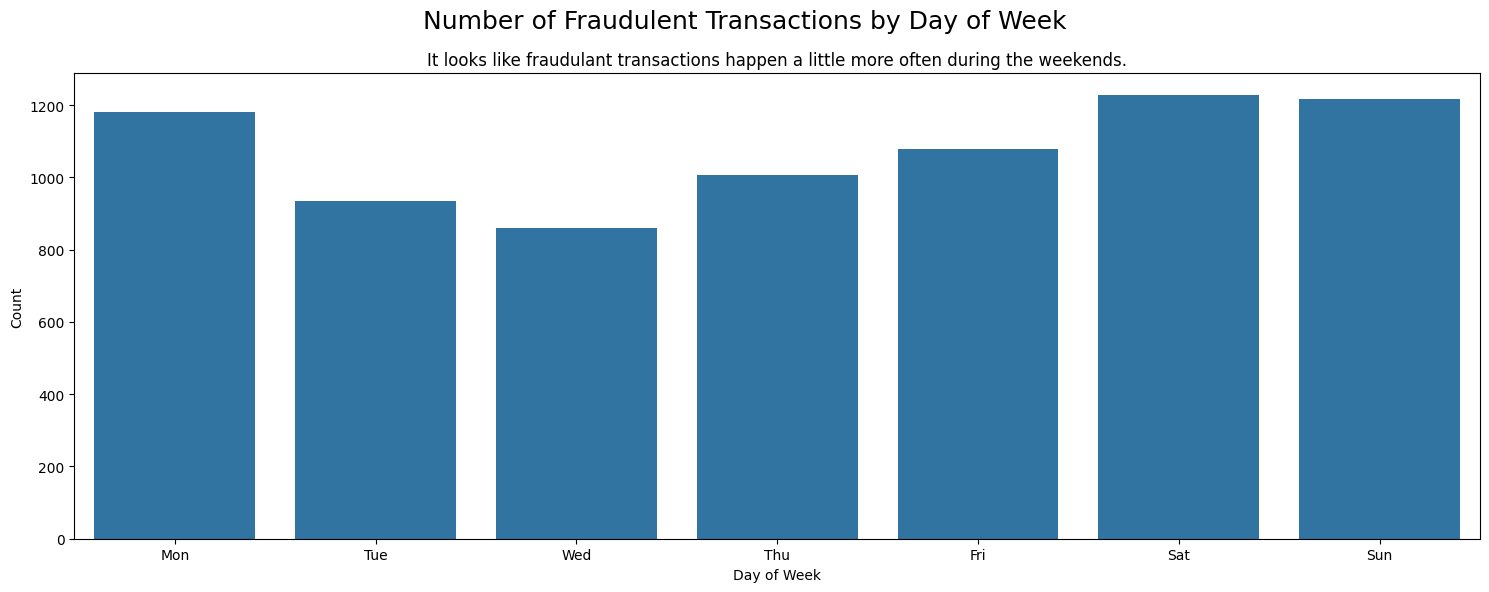

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot(data=fraudulant_transactions, x="dayofweek", order=days.values())
plt.suptitle("Number of Fraudulent Transactions by Day of Week", fontsize=18)
plt.title(
    "It looks like fraudulant transactions happen a little more often during the weekends."
)
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### `hour`

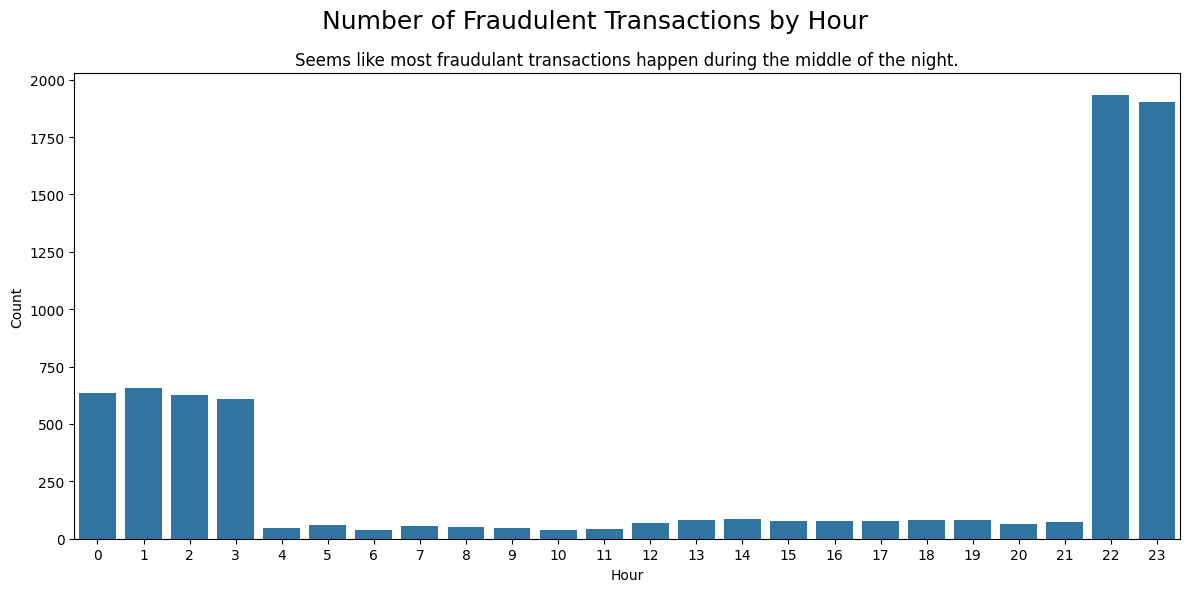

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=fraudulant_transactions,
    x="hour",
    order=sorted(fraudulant_transactions["hour"].unique()),
)
plt.suptitle("Number of Fraudulent Transactions by Hour", fontsize=18)
plt.title(
    "Seems like most fraudulant transactions happen during the middle of the night."
)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### `age` 

In [28]:
fraudulant_transactions.loc[:, "age"] = (
    fraudulant_transactions["trans_date_trans_time"].dt.year
    - fraudulant_transactions["dob"].dt.year
)

[04/02/24 21:24:49] WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/16143 ]8;id=535941;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=215742;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             09183.py:1: SettingWithCopyWarning:                                                   
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               fraudulant_transactions.loc[:, "age"] =                                             
                             fraudulant_transactions["trans_date_trans_time"].dt.year -                            
                             fraudulant_transactions["dob"].dt.year                                                
                                                                                                                   

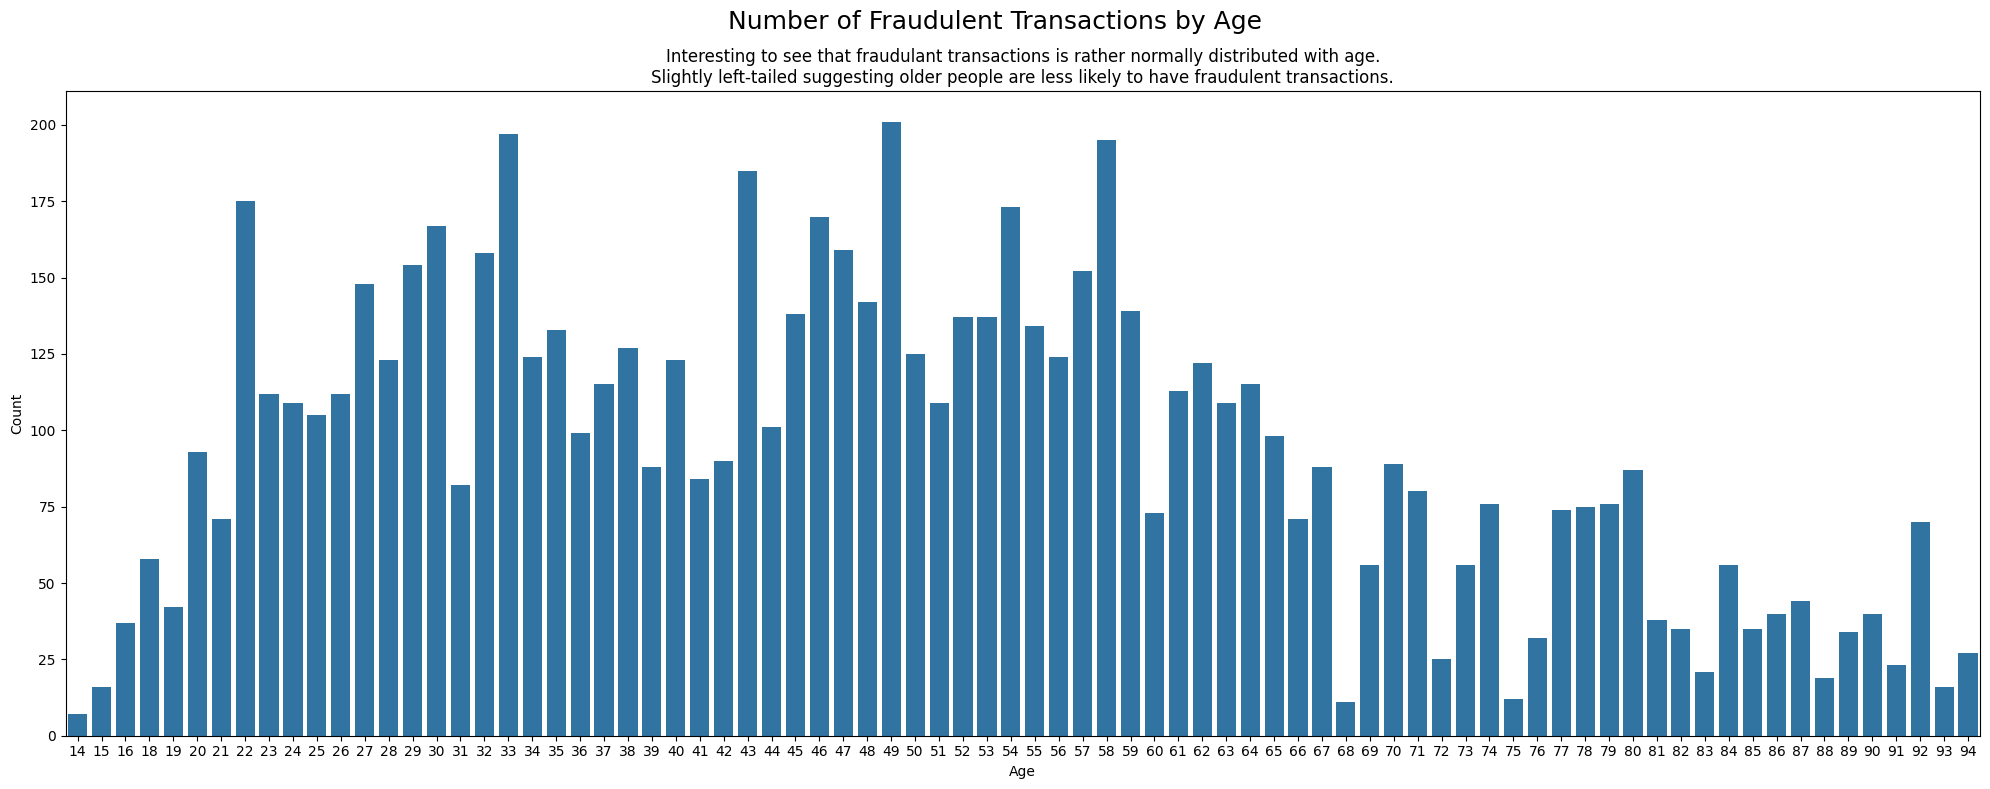

In [29]:
plt.figure(figsize=(20, 8))
sns.countplot(
    data=fraudulant_transactions,
    x="age",
    order=sorted(fraudulant_transactions["age"].unique()),
)
plt.suptitle("Number of Fraudulent Transactions by Age", fontsize=18)
plt.title(
    "Interesting to see that fraudulant transactions is rather normally distributed with age.\nSlightly left-tailed suggesting older people are less likely to have fraudulent transactions."
)
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### `gender`

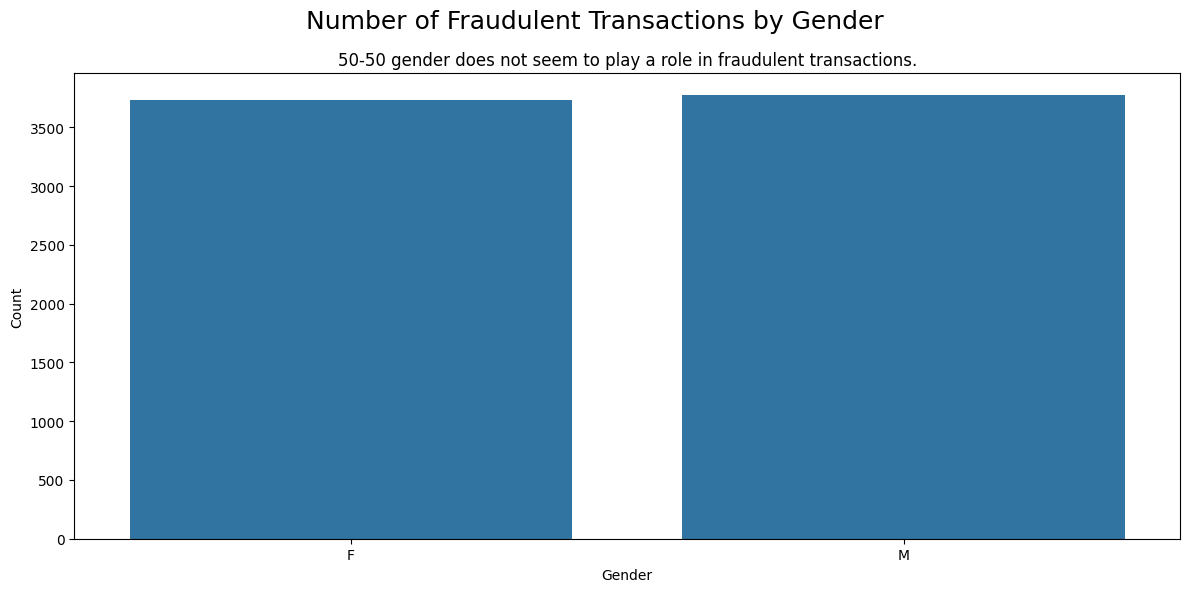

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=fraudulant_transactions,
    x="gender",
    order=sorted(fraudulant_transactions["gender"].unique()),
)
plt.suptitle("Number of Fraudulent Transactions by Gender", fontsize=18)
plt.title("50-50 gender does not seem to play a role in fraudulent transactions.")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### `city_pop`

In [31]:
top_cities


Index(['Houston', 'Warren', 'Huntsville', 'Naples', 'Dallas', 'Tulsa',
       'Topeka', 'Detroit', 'Utica', 'Randolph', 'San Antonio', 'Albuquerque',
       'Clearwater', 'Beaver Falls', 'Aurora', 'New York City', 'Bay City',
       'Fenelton', 'Lakeland', 'Washington', 'Brandon', 'Fort Washakie',
       'Hudson', 'Allentown', 'Albany', 'Kenner', 'Hampton', 'Mesa', 'Hubbell',
       'Hovland'],
      dtype='object', name='city')

In [32]:
populations_in_top_cities = {
    city: fraudulant_transactions["city_pop"][
        fraudulant_transactions["city"] == city
    ].iloc[0]
    for city in top_cities
}
populations_in_top_cities


{
    'Houston': 2906700,
    'Warren': 75903,
    'Huntsville': 190178,
    'Naples': 276002,
    'Dallas': 1263321,
    'Tulsa': 413574,
    'Topeka': 163415,
    'Detroit': 673342,
    'Utica': 271,
    'Randolph': 51,
    'San Antonio': 1595797,
    'Albuquerque': 641349,
    'Clearwater': 172247,
    'Beaver Falls': 28425,
    'Aurora': 389246,
    'New York City': 1577385,
    'Bay City': 67858,
    'Fenelton': 2054,
    'Lakeland': 237282,
    'Washington': 601723,
    'Brandon': 5895,
    'Fort Washakie': 1645,
    'Hudson': 215,
    'Allentown': 166081,
    'Albany': 151022,
    'Kenner': 68211,
    'Hampton': 136895,
    'Mesa': 478404,
    'Hubbell': 121,
    'Hovland': 272
}

### `long`, `lat`, `merch_long` and `merch_lat`

In [33]:
from geopy.distance import geodesic


# Example
lat1 = 52.2296756
long1 = 21.0122287
lat2 = 52.406374
long2 = 16.9251681

coords_1 = (lat1, long1)
coords_2 = (lat2, long2)

print(geodesic(coords_1, coords_2).km)

279.35290160430094


In [34]:
distances = []
for i in tqdm(range(len(fraudulant_transactions))):
    holder_lat = fraudulant_transactions.iloc[i]["lat"]
    holder_long = fraudulant_transactions.iloc[i]["lat"]
    merch_lat = fraudulant_transactions.iloc[i]["merch_lat"]
    merch_long = fraudulant_transactions.iloc[i]["merch_long"]

    holder_coords = (holder_lat, holder_long)
    merch_coords = (merch_lat, merch_long)

    distance = geodesic(holder_coords, merch_coords).km
    distances.append(distance)

fraudulant_transactions["distance"] = distances

100%|██████████| 7506/7506 [00:01<00:00, 4092.59it/s]


[04/02/24 21:24:51] WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/31924 ]8;id=100206;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=222652;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             12182.py:14: SettingWithCopyWarning:                                                  
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               fraudulant_transactions["distance"] = distances                                     
                                                                                                                   

In [35]:
distances = []
for i in tqdm(range(len(non_fraudulant_transactions))):
    holder_lat = non_fraudulant_transactions.iloc[i]["lat"]
    holder_long = non_fraudulant_transactions.iloc[i]["lat"]
    merch_lat = non_fraudulant_transactions.iloc[i]["merch_lat"]
    merch_long = non_fraudulant_transactions.iloc[i]["merch_long"]

    holder_coords = (holder_lat, holder_long)
    merch_coords = (merch_lat, merch_long)

    distance = geodesic(holder_coords, merch_coords).km
    distances.append(distance)

non_fraudulant_transactions["distance"] = distances

100%|██████████| 1289169/1289169 [05:11<00:00, 4141.26it/s]


[04/02/24 21:30:03] WARNING  /var/folders/bx/p7m1k3qn7f1cynghy4m89byw0000gn/T/ipykernel_86329/42538 ]8;id=694429;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=451496;file:///opt/anaconda3/envs/kedro-session/lib/python3.10/warnings.py#109\109]8;;\
                             00397.py:14: SettingWithCopyWarning:                                                  
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               non_fraudulant_transactions["distance"] = distances                                 
                                                                                                                   

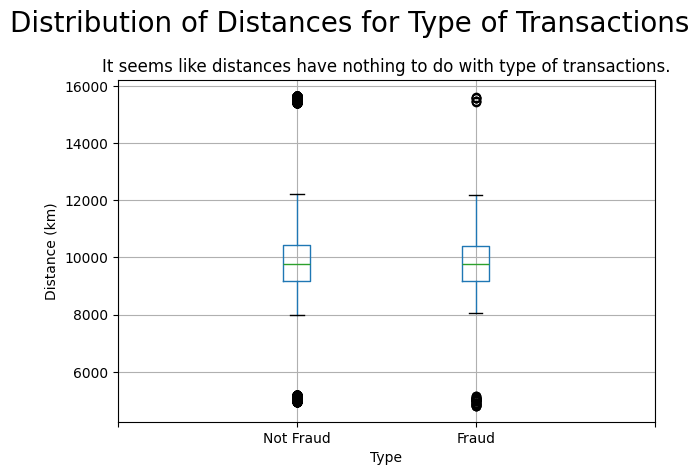

In [36]:
tmp = pd.concat(
    [
        fraudulant_transactions[["distance", "is_fraud"]],
        non_fraudulant_transactions[["distance", "is_fraud"]],
    ],
    axis=0,
)

tmp.boxplot(column=["distance"], by="is_fraud")

plt.suptitle("Distribution of Distances for Type of Transactions", fontsize=20)
plt.title("It seems like distances have nothing to do with type of transactions.")
plt.xlabel("Type")
plt.ylabel("Distance (km)")
plt.xticks([0, 1, 2, 3], ["", "Not Fraud", "Fraud", ""])
plt.tight_layout()
plt.show()